In [1]:
!pip install pyspark

In [1]:
import pyspark

import findspark
findspark.init()
findspark.find()

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

# 

In [2]:
spark= SparkSession.builder.appName("Datos_defunciones").getOrCreate()

In [3]:
spark

In [4]:
df=spark.read.csv("Datos_concatenados_no_convertidos.csv", header=True, inferSchema=True)

In [5]:
df

DataFrame[_c0: int, ent_regis: int, mun_regis: int, ent_resid: int, mun_resid: int, tloc_resid: int, ent_ocurr: int, mun_ocurr: int, causa_def: string, lista_mex: string, sexo: int, edad: int, dia_ocurr: int, mes_ocurr: int, anio_ocur: int, mes_regis: int, anio_regis: int, dia_nacim: int, mes_nacim: int, anio_nacim: int, ocupacion: int, escolarida: int, edo_civil: int, presunto: double, ocurr_trab: int, lugar_ocur: int, necropsia: int, asist_medi: int, sitio_ocur: int, cond_cert: int, cert_nomed: double, nacionalid: int, derechohab: int, embarazo: int, rel_emba: int, horas: int, minutos: int, capitulo: int, grupo: int, lista1: double, gr_lismex: string, vio_fami: double, edad_agru: int, maternas: string, dis_re_oax: int, tloc_ocurr: double, dia_regis: double, area_ur: double, complicaro: double, dia_cert: double, mes_cert: double, anio_cert: double, peso: double, lengua: double, cond_act: double, par_agre: double, ent_ocules: double, mun_ocules: double, loc_resid: double, loc_ocurr: do

In [6]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ent_regis: integer (nullable = true)
 |-- mun_regis: integer (nullable = true)
 |-- ent_resid: integer (nullable = true)
 |-- mun_resid: integer (nullable = true)
 |-- tloc_resid: integer (nullable = true)
 |-- ent_ocurr: integer (nullable = true)
 |-- mun_ocurr: integer (nullable = true)
 |-- causa_def: string (nullable = true)
 |-- lista_mex: string (nullable = true)
 |-- sexo: integer (nullable = true)
 |-- edad: integer (nullable = true)
 |-- dia_ocurr: integer (nullable = true)
 |-- mes_ocurr: integer (nullable = true)
 |-- anio_ocur: integer (nullable = true)
 |-- mes_regis: integer (nullable = true)
 |-- anio_regis: integer (nullable = true)
 |-- dia_nacim: integer (nullable = true)
 |-- mes_nacim: integer (nullable = true)
 |-- anio_nacim: integer (nullable = true)
 |-- ocupacion: integer (nullable = true)
 |-- escolarida: integer (nullable = true)
 |-- edo_civil: integer (nullable = true)
 |-- presunto: double (nullable = true)
 |-

In [7]:
df.show()

+---+---------+---------+---------+---------+----------+---------+---------+---------+---------+----+----+---------+---------+---------+---------+----------+---------+---------+----------+---------+----------+---------+--------+----------+----------+---------+----------+----------+---------+----------+----------+----------+--------+--------+-----+-------+--------+-----+------+---------+--------+---------+--------+----------+----------+---------+-------+----------+--------+--------+---------+----+------+--------+--------+----------+----------+---------+---------+----------+-------+--------+----------+---------+----------+-------+-------+--------+----------+----------+--------+------+----------+-------+--------+----------+----------+-------+--------+
|_c0|ent_regis|mun_regis|ent_resid|mun_resid|tloc_resid|ent_ocurr|mun_ocurr|causa_def|lista_mex|sexo|edad|dia_ocurr|mes_ocurr|anio_ocur|mes_regis|anio_regis|dia_nacim|mes_nacim|anio_nacim|ocupacion|escolarida|edo_civil|presunto|ocurr_trab|lu

In [8]:
df.count()

14508281

In [9]:
from pyspark.ml.feature import StringIndexer

In [10]:
indexer = StringIndexer(inputCol = "causa_def", outputCol = "def_indexada")
df_indexado = indexer.fit(df).transform(df)

In [11]:
indexer = StringIndexer(inputCol = "lista_mex", outputCol = "lista_mex_indexada")
df_indexado = indexer.fit(df_indexado).transform(df_indexado)

In [12]:
df_indexado.show()

+---+---------+---------+---------+---------+----------+---------+---------+---------+---------+----+----+---------+---------+---------+---------+----------+---------+---------+----------+---------+----------+---------+--------+----------+----------+---------+----------+----------+---------+----------+----------+----------+--------+--------+-----+-------+--------+-----+------+---------+--------+---------+--------+----------+----------+---------+-------+----------+--------+--------+---------+----+------+--------+--------+----------+----------+---------+---------+----------+-------+--------+----------+---------+----------+-------+-------+--------+----------+----------+--------+------+----------+-------+--------+----------+----------+-------+--------+------------+------------------+
|_c0|ent_regis|mun_regis|ent_resid|mun_resid|tloc_resid|ent_ocurr|mun_ocurr|causa_def|lista_mex|sexo|edad|dia_ocurr|mes_ocurr|anio_ocur|mes_regis|anio_regis|dia_nacim|mes_nacim|anio_nacim|ocupacion|escolarida|

In [13]:
from pyspark.ml.feature import VectorAssembler, ChiSqSelector

In [14]:
inputCols = [
    'ent_regis',
    'lista_mex_indexada',
    'def_indexada',
    'sexo',
    'edad',
    'ocupacion',
    'escolarida',
    'edo_civil',
    'presunto',
    'asist_medi',
    'vio_fami'
]

In [15]:
df_indexado.show()

+---+---------+---------+---------+---------+----------+---------+---------+---------+---------+----+----+---------+---------+---------+---------+----------+---------+---------+----------+---------+----------+---------+--------+----------+----------+---------+----------+----------+---------+----------+----------+----------+--------+--------+-----+-------+--------+-----+------+---------+--------+---------+--------+----------+----------+---------+-------+----------+--------+--------+---------+----+------+--------+--------+----------+----------+---------+---------+----------+-------+--------+----------+---------+----------+-------+-------+--------+----------+----------+--------+------+----------+-------+--------+----------+----------+-------+--------+------------+------------------+
|_c0|ent_regis|mun_regis|ent_resid|mun_resid|tloc_resid|ent_ocurr|mun_ocurr|causa_def|lista_mex|sexo|edad|dia_ocurr|mes_ocurr|anio_ocur|mes_regis|anio_regis|dia_nacim|mes_nacim|anio_nacim|ocupacion|escolarida|

In [16]:
df_indexado=df_indexado.select("ent_regis",'lista_mex_indexada','def_indexada','sexo','edad','ocupacion','escolarida','edo_civil','presunto','asist_medi','vio_fami','grupo')

In [17]:
df_indexado=df_indexado.dropna()

In [18]:
assembler = VectorAssembler(inputCols = inputCols, outputCol = "features")
df_with_features = assembler.transform(df_indexado)

df_with_features.select('features').show(100, False)

+-----------------------------------------------------+
|features                                             |
+-----------------------------------------------------+
|[1.0,35.0,29.0,2.0,4090.0,2.0,3.0,2.0,9.0,1.0,9.0]   |
|[1.0,51.0,52.0,2.0,2018.0,98.0,9.0,9.0,9.0,1.0,9.0]  |
|[1.0,10.0,174.0,2.0,4998.0,2.0,1.0,6.0,1.0,2.0,9.0]  |
|[1.0,1.0,0.0,2.0,4998.0,2.0,9.0,6.0,9.0,1.0,9.0]     |
|[1.0,0.0,195.0,2.0,4078.0,2.0,4.0,6.0,9.0,1.0,9.0]   |
|[1.0,119.0,240.0,1.0,4051.0,11.0,7.0,2.0,9.0,1.0,9.0]|
|[1.0,52.0,124.0,1.0,4078.0,2.0,4.0,2.0,9.0,2.0,9.0]  |
|[1.0,32.0,51.0,1.0,3002.0,98.0,9.0,9.0,9.0,1.0,9.0]  |
|[1.0,28.0,20.0,2.0,4082.0,2.0,6.0,1.0,9.0,1.0,9.0]   |
|[1.0,25.0,21.0,1.0,4098.0,71.0,2.0,2.0,9.0,1.0,9.0]  |
|[1.0,70.0,78.0,1.0,4073.0,52.0,1.0,2.0,9.0,2.0,9.0]  |
|[1.0,8.0,163.0,2.0,4060.0,2.0,1.0,6.0,9.0,1.0,9.0]   |
|[1.0,10.0,174.0,1.0,4019.0,62.0,5.0,1.0,1.0,1.0,9.0] |
|[1.0,18.0,36.0,1.0,2005.0,98.0,9.0,9.0,9.0,1.0,9.0]  |
|[1.0,0.0,31.0,1.0,4075.0,52.0,2.0,6.0,9.0,1.0,9

In [19]:
# Selección de características usando Chi-Square
selector = ChiSqSelector(numTopFeatures = 3, featuresCol = "features", labelCol="grupo",
                         outputCol="selected_features")
df_sel = selector.fit(df_with_features).transform(df_with_features)
df_sel.show(5)

+---------+------------------+------------+----+----+---------+----------+---------+--------+----------+--------+-----+--------------------+-----------------+
|ent_regis|lista_mex_indexada|def_indexada|sexo|edad|ocupacion|escolarida|edo_civil|presunto|asist_medi|vio_fami|grupo|            features|selected_features|
+---------+------------------+------------+----+----+---------+----------+---------+--------+----------+--------+-----+--------------------+-----------------+
|        1|              35.0|        29.0|   2|4090|        2|         3|        2|     9.0|         1|     9.0|    4|[1.0,35.0,29.0,2....|  [1.0,35.0,29.0]|
|        1|              51.0|        52.0|   2|2018|       98|         9|        9|     9.0|         1|     9.0|    5|[1.0,51.0,52.0,2....|  [1.0,51.0,52.0]|
|        1|              10.0|       174.0|   2|4998|        2|         1|        6|     1.0|         2|     9.0|   25|[1.0,10.0,174.0,2...| [1.0,10.0,174.0]|
|        1|               1.0|         0.0|   

In [20]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator 


In [24]:
#silhouette_score=[] 
silhouette_score=[0.9284602995721694,
 0.9093726733723374,
 0.8710855943368215,
 0.874738529815988,
 0.7058118632185095,
 0.7304722969480356]

In [23]:
evaluator = ClusteringEvaluator(predictionCol='prediction', 
                                featuresCol='features', 
                                metricName='silhouette',  
                                distanceMeasure='squaredEuclidean') 
  
for i in range(5,20): 
    kmeans=KMeans(featuresCol='features', k=i) 
    model=kmeans.fit(df_with_features) 
    predictions=model.transform(df_with_features) 
    score=evaluator.evaluate(predictions) 
    silhouette_score.append(score) 
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 5 is 0.9284602995721694
Silhouette Score for k = 6 is 0.9093726733723374
Silhouette Score for k = 7 is 0.8710855943368215
Silhouette Score for k = 8 is 0.874738529815988
Silhouette Score for k = 9 is 0.7058118632185095
Silhouette Score for k = 10 is 0.7304722969480356


ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "c:\Users\Victor\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Victor\AppData\Local\Temp\ipykernel_66832\1580362422.py", line 8, in <module>
    model=kmeans.fit(df_with_features)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Victor\anaconda3\Lib\site-packages\pyspark\ml\base.py", line 205, in fit
    return self._fit(dataset)
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Victor\anaconda3\Lib\site-packages\pyspark\ml\wrapper.py", line 381, in _fit
    java_model = self._fit_java(dataset)
                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Victor\anaconda3\Lib\site-packages\pyspark\ml\wrapper.py", line 378, in _fit_java
    return self._java_obj.fit(dataset._jdf)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Victor\anaconda3\Lib\site-packages\py4j\java_gateway.py

ConnectionRefusedError: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión

In [25]:
silhouette_score

[0.9284602995721694,
 0.9093726733723374,
 0.8710855943368215,
 0.874738529815988,
 0.7058118632185095,
 0.7304722969480356]

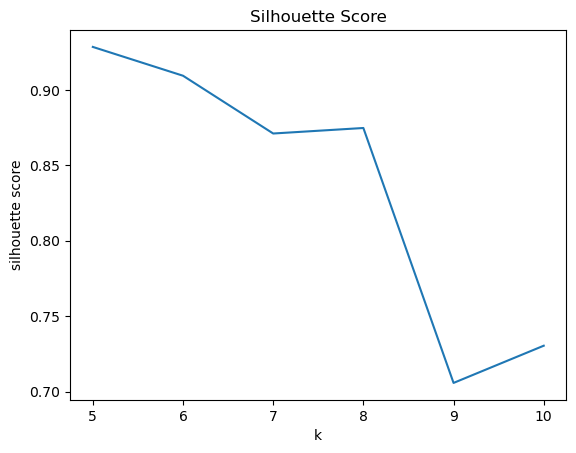

In [26]:
import matplotlib.pyplot as plt 
  
plt.plot(range(5,11),silhouette_score) 
plt.xlabel('k') 
plt.ylabel('silhouette score') 
plt.title('Silhouette Score') 
plt.show()

In [27]:
kmeans = KMeans().setK(5)
model = kmeans.fit(df_with_features)


In [28]:
predictions = model.transform(df_with_features)
predictions.select("prediction").show()

+----------+
|prediction|
+----------+
|         0|
|         1|
|         0|
|         0|
|         0|
|         0|
|         0|
|         3|
|         0|
|         0|
|         0|
|         0|
|         0|
|         1|
|         0|
|         0|
|         0|
|         3|
|         0|
|         0|
+----------+
only showing top 20 rows



In [29]:
centers = model.clusterCenters() 
print("Centro del cluster: ") 
for center in centers: 
    print(center)

Centro del cluster: 
[1.64681306e+01 1.86079712e+01 4.83804802e+01 1.44469001e+00
 4.07139401e+03 2.22573397e+01 7.01731152e+00 3.70963991e+00
 7.52542261e+00 1.63838532e+00 8.08619516e+00]
[1.63479568e+01 5.45833312e+01 2.95412395e+02 1.46688609e+00
 1.69861291e+03 9.71163725e+01 3.91811815e+01 8.11637246e+00
 8.16740699e+00 1.36623083e+00 8.11631481e+00]
[1.61961752e+01 8.50270351e+01 1.35728588e+03 1.41990261e+00
 4.01901133e+03 3.23854320e+01 1.01197928e+01 3.99635274e+00
 6.26475151e+00 1.79290512e+00 8.09640776e+00]
[1.61526466e+01 6.78181494e+01 4.45362563e+02 1.41836140e+00
 3.88701767e+03 3.90029868e+01 1.27394235e+01 4.41428016e+00
 6.85377387e+00 1.73602950e+00 8.09190997e+00]
[1.64223473e+01 1.07652842e+02 3.24719632e+03 1.41108813e+00
 3.88103034e+03 3.82735524e+01 1.22513787e+01 4.25331904e+00
 6.00444240e+00 1.80464920e+00 8.08738000e+00]
